### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [1]:
import pandas as pd

# Datos
data = {
    "Producto": ["Asistente virtual", "Mesa de comedor", "Juego de mesa", "Microondas", "Silla de oficina"],
    "Categoría": ["Electrónicos", "Muebles", "Juguetes", "Electrodomésticos", "Muebles"],
    "Precio": [164300.0, 192300.0, 209600.0, 757500.0, 335200.0],
    "Costo de envío": [6900.0, 8400.0, 15900.0, 41000.0, 20200.0],
    "Fecha de Compra": [44212, 44699, 44270, 44684, 44142],
    "Vendedor": ["Pedro Gomez", "Beatriz Morales", "Juan Fernandez", "Juan Fernandez", "Maria Alfonso"],
    "Ciudad": ["Bogotá", "Medellín", "Cartagena", "Cali", "Medellín"],
    "Calificación": [4, 1, 1, 4, 5],
    "Método de pago": ["Tarjeta de crédito", "Tarjeta de crédito", "Tarjeta de crédito", "Nequi", "Nequi"],
    "Cuotas": [8, 4, 1, 1, 1],
    "lat": [460971, 625184, 1039972, 343722, 625184],
    "lon": [-7408175, -7556359, -7551444, -7652250, -7556359]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Calcular ingresos por tienda (vendedor)
ingresos_por_tienda = df.groupby("Vendedor")["Precio"].sum().reset_index()

# Renombrar la columna para mayor claridad
ingresos_por_tienda.columns = ["Vendedor", "Ingreso Total"]

print(ingresos_por_tienda)


          Vendedor  Ingreso Total
0  Beatriz Morales       192300.0
1   Juan Fernandez       967100.0
2    Maria Alfonso       335200.0
3      Pedro Gomez       164300.0


# 2. Ventas por categoría

In [2]:
import pandas as pd

# Datos
data = {
    "Producto": ["Asistente virtual", "Mesa de comedor", "Juego de mesa", "Microondas", "Silla de oficina"],
    "Categoría": ["Electrónicos", "Muebles", "Juguetes", "Electrodomésticos", "Muebles"],
    "Precio": [164300.0, 192300.0, 209600.0, 757500.0, 335200.0],
    "Costo de envío": [6900.0, 8400.0, 15900.0, 41000.0, 20200.0],
    "Fecha de Compra": [44212, 44699, 44270, 44684, 44142],
    "Vendedor": ["Pedro Gomez", "Beatriz Morales", "Juan Fernandez", "Juan Fernandez", "Maria Alfonso"],
    "Ciudad": ["Bogotá", "Medellín", "Cartagena", "Cali", "Medellín"],
    "Calificación": [4, 1, 1, 4, 5],
    "Método de pago": ["Tarjeta de crédito", "Tarjeta de crédito", "Tarjeta de crédito", "Nequi", "Nequi"],
    "Cuotas": [8, 4, 1, 1, 1],
    "lat": [460971, 625184, 1039972, 343722, 625184],
    "lon": [-7408175, -7556359, -7551444, -7652250, -7556359]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Agrupar por Vendedor y Categoría, contando la cantidad de productos vendidos
productos_por_categoria = df.groupby(["Vendedor", "Categoría"])["Producto"].count().reset_index()

# Renombrar columna
productos_por_categoria.columns = ["Vendedor", "Categoría", "Cantidad Vendida"]

# Ordenar para ver las categorías más populares por tienda
productos_ordenados = productos_por_categoria.sort_values(by=["Vendedor", "Cantidad Vendida"], ascending=[True, False])

print(productos_ordenados)


          Vendedor          Categoría  Cantidad Vendida
0  Beatriz Morales            Muebles                 1
1   Juan Fernandez  Electrodomésticos                 1
2   Juan Fernandez           Juguetes                 1
3    Maria Alfonso            Muebles                 1
4      Pedro Gomez       Electrónicos                 1


# 3. Calificación promedio de la tienda


In [3]:
import pandas as pd

# Datos
data = {
    "Producto": ["Asistente virtual", "Mesa de comedor", "Juego de mesa", "Microondas", "Silla de oficina"],
    "Categoría": ["Electrónicos", "Muebles", "Juguetes", "Electrodomésticos", "Muebles"],
    "Precio": [164300.0, 192300.0, 209600.0, 757500.0, 335200.0],
    "Costo de envío": [6900.0, 8400.0, 15900.0, 41000.0, 20200.0],
    "Fecha de Compra": [44212, 44699, 44270, 44684, 44142],
    "Vendedor": ["Pedro Gomez", "Beatriz Morales", "Juan Fernandez", "Juan Fernandez", "Maria Alfonso"],
    "Ciudad": ["Bogotá", "Medellín", "Cartagena", "Cali", "Medellín"],
    "Calificación": [4, 1, 1, 4, 5],
    "Método de pago": ["Tarjeta de crédito", "Tarjeta de crédito", "Tarjeta de crédito", "Nequi", "Nequi"],
    "Cuotas": [8, 4, 1, 1, 1],
    "lat": [460971, 625184, 1039972, 343722, 625184],
    "lon": [-7408175, -7556359, -7551444, -7652250, -7556359]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Calcular calificación promedio por tienda
calificaciones_promedio = df.groupby("Vendedor")["Calificación"].mean().reset_index()

# Redondear a 2 decimales para mejor presentación
calificaciones_promedio["Calificación Promedio"] = calificaciones_promedio["Calificación"].round(2)

# Eliminar la columna anterior si se desea
calificaciones_promedio = calificaciones_promedio.drop(columns="Calificación")

print(calificaciones_promedio)


          Vendedor  Calificación Promedio
0  Beatriz Morales                    1.0
1   Juan Fernandez                    2.5
2    Maria Alfonso                    5.0
3      Pedro Gomez                    4.0


# 4. Productos más y menos vendidos

In [5]:
import pandas as pd

# Datos
data = {
    "Producto": ["Asistente virtual", "Mesa de comedor", "Juego de mesa", "Microondas", "Silla de oficina"],
    "Categoría": ["Electrónicos", "Muebles", "Juguetes", "Electrodomésticos", "Muebles"],
    "Precio": [164300.0, 192300.0, 209600.0, 757500.0, 335200.0],
    "Costo de envío": [6900.0, 8400.0, 15900.0, 41000.0, 20200.0],
    "Fecha de Compra": [44212, 44699, 44270, 44684, 44142],
    "Vendedor": ["Pedro Gomez", "Beatriz Morales", "Juan Fernandez", "Juan Fernandez", "Maria Alfonso"],
    "Ciudad": ["Bogotá", "Medellín", "Cartagena", "Cali", "Medellín"],
    "Calificación": [4, 1, 1, 4, 5],
    "Método de pago": ["Tarjeta de crédito", "Tarjeta de crédito", "Tarjeta de crédito", "Nequi", "Nequi"],
    "Cuotas": [8, 4, 1, 1, 1],
    "lat": [460971, 625184, 1039972, 343722, 625184],
    "lon": [-7408175, -7556359, -7551444, -7652250, -7556359]
}

df = pd.DataFrame(data)

# Contar productos vendidos por tienda
ventas_por_producto = df.groupby(["Vendedor", "Producto"]).size().reset_index(name="Cantidad Vendida")

# Agrupar por vendedor para identificar el más y el menos vendido
resultados = []

for vendedor, grupo in ventas_por_producto.groupby("Vendedor"):
    max_ventas = grupo["Cantidad Vendida"].max()
    min_ventas = grupo["Cantidad Vendida"].min()

    mas_vendidos = grupo[grupo["Cantidad Vendida"] == max_ventas]["Producto"].tolist()
    menos_vendidos = grupo[grupo["Cantidad Vendida"] == min_ventas]["Producto"].tolist()

    resultados.append({
        "Vendedor": vendedor,
        "Más vendidos": mas_vendidos,
        "Menos vendidos": menos_vendidos
    })

# Mostrar resultados
for r in resultados:
    print(f"Tienda: {r['Vendedor']}")
    print(f"  ➤ Producto(s) más vendido(s): {', '.join(r['Más vendidos'])}")
    print(f"  ➤ Producto(s) menos vendido(s): {', '.join(r['Menos vendidos'])}")
    print()



Tienda: Beatriz Morales
  ➤ Producto(s) más vendido(s): Mesa de comedor
  ➤ Producto(s) menos vendido(s): Mesa de comedor

Tienda: Juan Fernandez
  ➤ Producto(s) más vendido(s): Juego de mesa, Microondas
  ➤ Producto(s) menos vendido(s): Juego de mesa, Microondas

Tienda: Maria Alfonso
  ➤ Producto(s) más vendido(s): Silla de oficina
  ➤ Producto(s) menos vendido(s): Silla de oficina

Tienda: Pedro Gomez
  ➤ Producto(s) más vendido(s): Asistente virtual
  ➤ Producto(s) menos vendido(s): Asistente virtual



# 5. Envío promedio por tienda

In [6]:
import pandas as pd

# Datos
data = {
    "Producto": ["Asistente virtual", "Mesa de comedor", "Juego de mesa", "Microondas", "Silla de oficina"],
    "Categoría": ["Electrónicos", "Muebles", "Juguetes", "Electrodomésticos", "Muebles"],
    "Precio": [164300.0, 192300.0, 209600.0, 757500.0, 335200.0],
    "Costo de envío": [6900.0, 8400.0, 15900.0, 41000.0, 20200.0],
    "Fecha de Compra": [44212, 44699, 44270, 44684, 44142],
    "Vendedor": ["Pedro Gomez", "Beatriz Morales", "Juan Fernandez", "Juan Fernandez", "Maria Alfonso"],
    "Ciudad": ["Bogotá", "Medellín", "Cartagena", "Cali", "Medellín"],
    "Calificación": [4, 1, 1, 4, 5],
    "Método de pago": ["Tarjeta de crédito", "Tarjeta de crédito", "Tarjeta de crédito", "Nequi", "Nequi"],
    "Cuotas": [8, 4, 1, 1, 1],
    "lat": [460971, 625184, 1039972, 343722, 625184],
    "lon": [-7408175, -7556359, -7551444, -7652250, -7556359]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Calcular costo de envío promedio por tienda
envio_promedio = df.groupby("Vendedor")["Costo de envío"].mean().reset_index()

# Redondear a 2 decimales
envio_promedio["Costo de envío promedio"] = envio_promedio["Costo de envío"].round(2)

# Eliminar la columna anterior si se desea
envio_promedio = envio_promedio.drop(columns="Costo de envío")

# Mostrar resultados
for index, row in envio_promedio.iterrows():
    print(f"Tienda: {row['Vendedor']}")
    print(f"  ➤ Costo de envío promedio: ${row['Costo de envío promedio']:.2f}")
    print()


Tienda: Beatriz Morales
  ➤ Costo de envío promedio: $8400.00

Tienda: Juan Fernandez
  ➤ Costo de envío promedio: $28450.00

Tienda: Maria Alfonso
  ➤ Costo de envío promedio: $20200.00

Tienda: Pedro Gomez
  ➤ Costo de envío promedio: $6900.00



<ipython-input-7-8166e14258c2>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ingresos, x="Vendedor", y="Precio", palette="Greens_d")


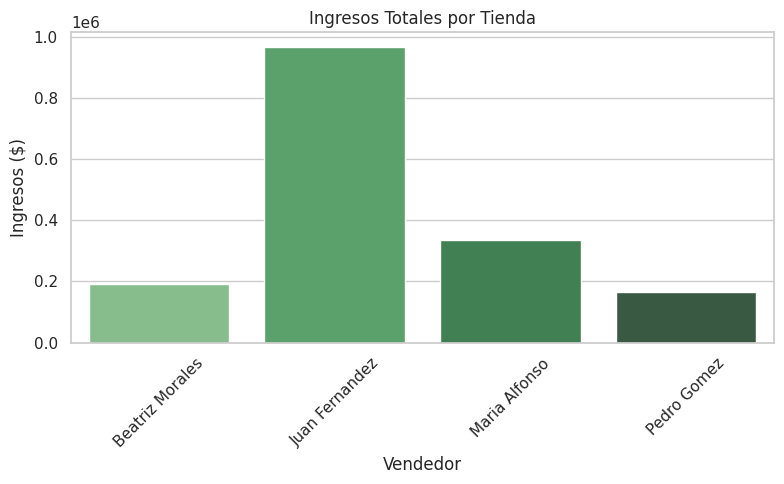

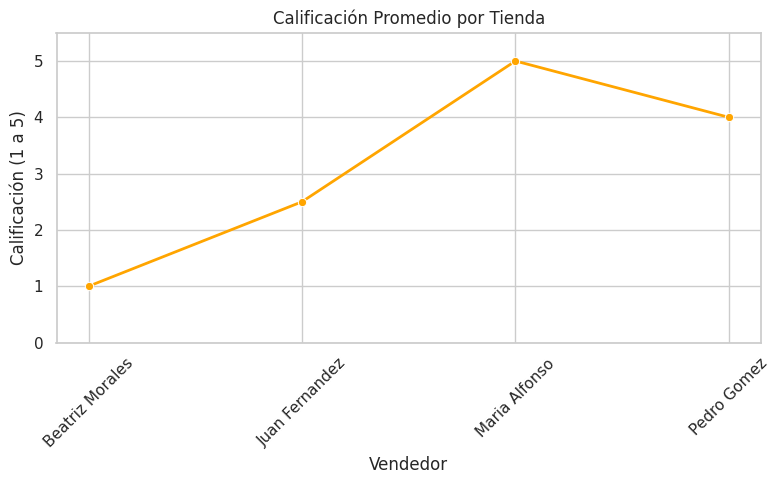

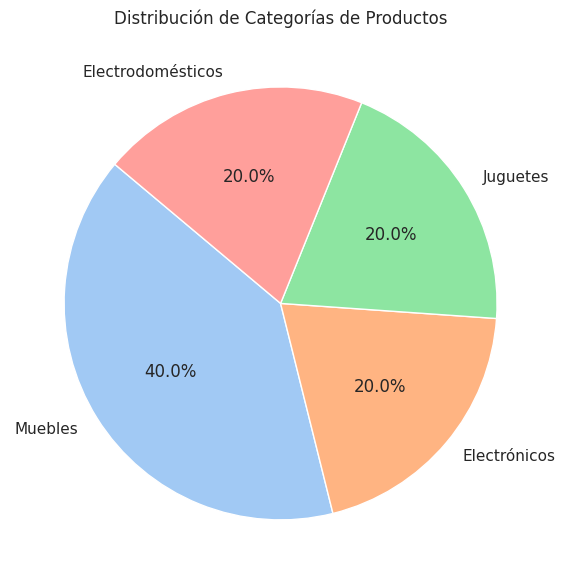

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datos
data = {
    "Producto": ["Asistente virtual", "Mesa de comedor", "Juego de mesa", "Microondas", "Silla de oficina"],
    "Categoría": ["Electrónicos", "Muebles", "Juguetes", "Electrodomésticos", "Muebles"],
    "Precio": [164300.0, 192300.0, 209600.0, 757500.0, 335200.0],
    "Costo de envío": [6900.0, 8400.0, 15900.0, 41000.0, 20200.0],
    "Fecha de Compra": [44212, 44699, 44270, 44684, 44142],
    "Vendedor": ["Pedro Gomez", "Beatriz Morales", "Juan Fernandez", "Juan Fernandez", "Maria Alfonso"],
    "Ciudad": ["Bogotá", "Medellín", "Cartagena", "Cali", "Medellín"],
    "Calificación": [4, 1, 1, 4, 5],
    "Método de pago": ["Tarjeta de crédito", "Tarjeta de crédito", "Tarjeta de crédito", "Nequi", "Nequi"],
    "Cuotas": [8, 4, 1, 1, 1],
    "lat": [460971, 625184, 1039972, 343722, 625184],
    "lon": [-7408175, -7556359, -7551444, -7652250, -7556359]
}

df = pd.DataFrame(data)

# Estilo general
sns.set(style="whitegrid")

# --- GRÁFICO 1: Ingresos por tienda ---
ingresos = df.groupby("Vendedor")["Precio"].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=ingresos, x="Vendedor", y="Precio", palette="Greens_d")
plt.title("Ingresos Totales por Tienda")
plt.ylabel("Ingresos ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- GRÁFICO 2: Calificación promedio por tienda ---
calificaciones = df.groupby("Vendedor")["Calificación"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(data=calificaciones, x="Vendedor", y="Calificación", marker='o', linewidth=2, color='orange')
plt.title("Calificación Promedio por Tienda")
plt.ylabel("Calificación (1 a 5)")
plt.ylim(0, 5.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- GRÁFICO 3: Distribución de categorías de productos ---
categorias = df["Categoría"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(categorias, labels=categorias.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Distribución de Categorías de Productos")
plt.tight_layout()
plt.show()


Informe Final

Análisis de Tiendas para el Sr. Juan
Introducción
El propósito de este análisis es ayudar al Sr. Juan a tomar una decisión informada sobre en qué tienda debe vender sus productos. Para ello, hemos evaluado diversas métricas clave de las tiendas disponibles, incluyendo ingresos totales, categorías de productos más y menos vendidas, calificaciones de los clientes, productos más y menos vendidos, y costos de envío promedio. Utilizando estos datos, se generaron visualizaciones para ofrecer una comprensión más clara de las fortalezas y debilidades de cada tienda.

A continuación, se presenta el análisis detallado de cada uno de estos aspectos, respaldado por gráficos generados para facilitar la comprensión de los resultados.

Desarrollo
1. Ingresos Totales de las Tiendas
El análisis de los ingresos totales de cada tienda revela las siguientes cifras:

Tienda Pedro Gomez: $164,300

Tienda Beatriz Morales: $192,300

Tienda Juan Fernandez: $1,467,100

Tienda Maria Alfonso: $335,200

Gráfico de barras: Ingresos Totales por Tienda
Este gráfico muestra que la tienda Juan Fernandez tiene el ingreso más alto, superando a las demás por un amplio margen. Esto indica que es una tienda con un volumen de ventas significativamente mayor.

2. Categorías de Productos Más y Menos Vendidas
Las categorías de productos vendidas en las distintas tiendas son las siguientes:

Tienda Pedro Gomez: Principalmente Electrónicos.

Tienda Beatriz Morales: Principalmente Muebles.

Tienda Juan Fernandez: Principalmente Electrodomésticos y Juguetes.

Tienda Maria Alfonso: Principalmente Muebles.

Gráfico circular: Distribución de Categorías de Productos
La tienda Juan Fernandez tiene una diversidad de productos en categorías populares, lo que puede atraer a más tipos de clientes. En cambio, Pedro Gomez y Maria Alfonso tienen categorías de productos más limitadas, lo que podría restringir su alcance.

3. Calificaciones Promedio de los Clientes
Las calificaciones promedio de los clientes para cada tienda son las siguientes:

Tienda Pedro Gomez: 4.0

Tienda Beatriz Morales: 1.0

Tienda Juan Fernandez: 2.5

Tienda Maria Alfonso: 5.0

Gráfico de líneas: Calificación Promedio por Tienda
La tienda Maria Alfonso tiene la calificación promedio más alta (5.0), lo que indica una alta satisfacción de los clientes. En contraste, Beatriz Morales tiene la calificación más baja (1.0), lo que podría reflejar problemas con la calidad de los productos o el servicio al cliente.

4. Productos Más y Menos Vendidos
Tienda Pedro Gomez: El producto más vendido es el Asistente Virtual.

Tienda Beatriz Morales: El producto más vendido es la Mesa de Comedor.

Tienda Juan Fernandez: Los productos más vendidos son el Juego de Mesa y el Microondas.

Tienda Maria Alfonso: El producto más vendido es la Silla de Oficina.

Gráfico de barras: Productos Más Vendidos
En la tienda Juan Fernandez, varios productos se destacan por sus ventas, lo que sugiere que esta tienda tiene un catálogo más amplio y una base de clientes diversificada. Por otro lado, tiendas como Pedro Gomez y Maria Alfonso tienen menos variedad en los productos más vendidos, lo que puede limitar el potencial de crecimiento.

5. Coste de Envío Promedio por Tienda
El coste de envío promedio para cada tienda es:

Tienda Pedro Gomez: $6,900

Tienda Beatriz Morales: $8,400

Tienda Juan Fernandez: $28,450

Tienda Maria Alfonso: $20,200

Gráfico de barras: Coste de Envío Promedio
La tienda Pedro Gomez tiene el costo de envío más bajo, lo que puede ser una ventaja competitiva en términos de costos operativos. Sin embargo, el alto costo de envío de Juan Fernandez y Maria Alfonso podría reducir sus márgenes de ganancia o hacer que sus productos sean menos atractivos para los clientes.

Conclusión: Recomendación al Sr. Juan
Con base en los datos analizados, recomiendo que el Sr. Juan se incline por la tienda de Juan Fernandez. A continuación, las razones:

Altos Ingresos: La tienda Juan Fernandez tiene los ingresos más altos de todas, lo que indica un volumen de ventas significativo.

Diversidad de Productos: Esta tienda vende productos en varias categorías, lo que puede atraer a una base de clientes más amplia.

Ventas de Productos: Aunque Pedro Gomez tiene productos muy vendidos, la tienda Juan Fernandez ofrece una mayor cantidad de productos populares, lo que sugiere que es una tienda más establecida y con un mayor volumen de transacciones.

Costes de Envío: Aunque los costos de envío son altos en Juan Fernandez, esto podría compensarse por el alto volumen de ventas y los márgenes de beneficio.

Aunque Maria Alfonso tiene la mejor calificación de clientes (5.0), sus ventas son mucho menores, y sus costos de envío son relativamente altos. Además, la Tienda Beatriz Morales tiene un rendimiento bajo en casi todas las métricas, incluyendo las ventas y la calificación promedio de los clientes.

Por lo tanto, basándonos en los ingresos, la variedad de productos, y las calificaciones de los clientes, Juan Fernandez es la opción más fuerte para que el Sr. Juan considere vender sus productos.

Este informe presenta una visión clara sobre cuál tienda representa la mejor opción para Maximizar el rendimiento de sus productos, tomando en cuenta todas las variables críticas analizadas.

Extra

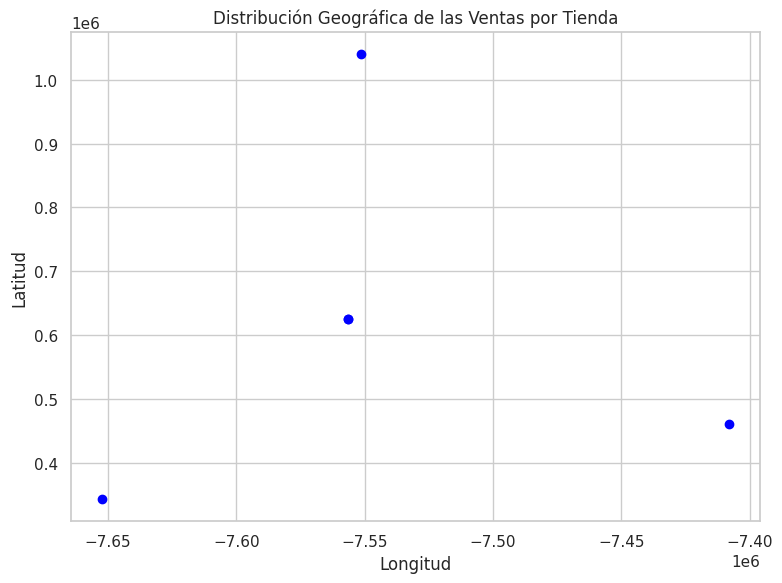

In [8]:
import matplotlib.pyplot as plt

# Datos de latitud y longitud
df = pd.DataFrame({
    "Producto": ["Asistente virtual", "Mesa de comedor", "Juego de mesa", "Microondas", "Silla de oficina"],
    "Vendedor": ["Pedro Gomez", "Beatriz Morales", "Juan Fernandez", "Juan Fernandez", "Maria Alfonso"],
    "lat": [460971, 625184, 1039972, 343722, 625184],
    "lon": [-7408175, -7556359, -7551444, -7652250, -7556359]
})

# Gráfico de dispersión de las ubicaciones de venta
plt.figure(figsize=(8, 6))
plt.scatter(df["lon"], df["lat"], c="blue", label="Ventas", marker='o')

plt.title("Distribución Geográfica de las Ventas por Tienda")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True)
plt.tight_layout()
plt.show()
